In [1]:
import requests
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
xy = pd.read_csv('C:/Users/user/github/Data/weather_xy.csv', encoding='cp949')

In [3]:
xx = xy.iloc[:,5].astype('str')

In [4]:
yy = xy.iloc[:,6].astype('str')

In [6]:
url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst'
params ={'serviceKey' : 'HBsd7IB4qCP0hHVD3lw2kZl+bAP0XU7KmA6WDTB8lh8AAbPtxJmuIgLJne4VTQB6NPgsIf9jRJ6nTjW9ZYykdw==', 
        'pageNo' : '17', 
        'numOfRows' : '12', 
        'dataType' : 'JSON', 
        'base_date' : '20230212', 
        'base_time' : '2300', 
        'nx' : '55', 
        'ny' : '127' }

response = requests.get(url, params=params)
print(response.content)


b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"baseDate":"20230212","baseTime":"2300","category":"SNO","fcstDate":"20230213","fcstTime":"1500","fcstValue":"\xec\xa0\x81\xec\x84\xa4\xec\x97\x86\xec\x9d\x8c","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"2300","category":"TMX","fcstDate":"20230213","fcstTime":"1500","fcstValue":"5.0","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"2300","category":"TMP","fcstDate":"20230213","fcstTime":"1600","fcstValue":"8","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"2300","category":"UUU","fcstDate":"20230213","fcstTime":"1600","fcstValue":"1","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"2300","category":"VVV","fcstDate":"20230213","fcstTime":"1600","fcstValue":"-3.7","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"2300","category":"VEC","fcstDate":"20230213","fcstTime":"1600","fcstValue":"345","nx":55,"ny":127},{"baseDate":"20230212","baseTime":"230

In [7]:
res = response.json()
res['response']['body']['items']

{'item': [{'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'SNO',
   'fcstDate': '20230213',
   'fcstTime': '1500',
   'fcstValue': '적설없음',
   'nx': 55,
   'ny': 127},
  {'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'TMX',
   'fcstDate': '20230213',
   'fcstTime': '1500',
   'fcstValue': '5.0',
   'nx': 55,
   'ny': 127},
  {'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'TMP',
   'fcstDate': '20230213',
   'fcstTime': '1600',
   'fcstValue': '8',
   'nx': 55,
   'ny': 127},
  {'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'UUU',
   'fcstDate': '20230213',
   'fcstTime': '1600',
   'fcstValue': '1',
   'nx': 55,
   'ny': 127},
  {'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'VVV',
   'fcstDate': '20230213',
   'fcstTime': '1600',
   'fcstValue': '-3.7',
   'nx': 55,
   'ny': 127},
  {'baseDate': '20230212',
   'baseTime': '2300',
   'category': 'VEC',
   'fcstDate': '20230213',
   'fcstTime': '1600',
   'fcs

In [8]:
time = ['0200','0500','0800','1100','1400','1700','2000','2300']

In [9]:
def weather_predict(page, base_date, base_time, nx, ny):
        df = []
        url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst'
        params ={'serviceKey' : 'HBsd7IB4qCP0hHVD3lw2kZl+bAP0XU7KmA6WDTB8lh8AAbPtxJmuIgLJne4VTQB6NPgsIf9jRJ6nTjW9ZYykdw==', 
                'pageNo' : '1', 
                'numOfRows' : '1000', 
                'dataType' : 'JSON', 
                'base_date' : base_date, 
                'base_time' : base_time, 
                'nx' : nx, 
                'ny' : ny }

        response = requests.get(url, params=params)
        res = response.json()
        try:
                res = pd.DataFrame(res['response']['body']['items'])
                for i in range(len(res)):
                        t = list(res['item'][i].values())
                        df.append(t)
                df = pd.DataFrame(df)
        except:
                pass
        return df

In [10]:
times = ['0200','0500']

In [11]:
import time

In [8]:
df_save = pd.DataFrame()
for i in tqdm(times):
    for j in tqdm(range(len(xx))):
        time.sleep(1)
        df_2 = weather_predict(1,'20230209','2300',xx[j],yy[j])
        if type(df_2) == list:
            pass
        else:
            df_save = pd.concat([df_save,df_2])

  0%|          | 0/2 [00:32<?, ?it/s]


ConnectTimeout: HTTPConnectionPool(host='apis.data.go.kr', port=80): Max retries exceeded with url: /1360000/VilageFcstInfoService_2.0/getVilageFcst?serviceKey=HBsd7IB4qCP0hHVD3lw2kZl%2BbAP0XU7KmA6WDTB8lh8AAbPtxJmuIgLJne4VTQB6NPgsIf9jRJ6nTjW9ZYykdw%3D%3D&pageNo=1&numOfRows=1000&dataType=JSON&base_date=20230209&base_time=0200&nx=60&ny=126 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000253AB15D610>, 'Connection to apis.data.go.kr timed out. (connect timeout=None)'))

In [15]:
df_save.columns = ['base_date','base_time','category','fcst_date','fcst_time','fcst_valuse','nx','ny']

In [17]:
df_save.to_csv('C:/Users/user/Desktop/test.csv', encoding='utf-8-sig', index=False)

In [34]:
df_save[df_save['category']=='SKY'].drop_duplicates()

,base_date,base_time,category,fcst_date,fcst_time,fcst_valuse,nx,ny
5,20230209,0200,SKY,20230209,0300,4,60,127
17,20230209,0200,SKY,20230209,0400,3,60,127
29,20230209,0200,SKY,20230209,0500,3,60,127
41,20230209,0200,SKY,20230209,0600,3,60,127
54,20230209,0200,SKY,20230209,0700,3,60,127
...,...,...,...,...,...,...,...,...
791,20230209,0200,SKY,20230211,2000,1,60,127
803,20230209,0200,SKY,20230211,2100,1,60,127
815,20230209,0200,SKY,20230211,2200,1,60,127
827,20230209,0200,SKY,20230211,2300,1,60,127


In [50]:
df_save

,base_date,base_time,category,fcst_date,fcst_time,fcst_valuse,nx,ny
0,20230209,0200,TMP,20230209,0300,-2,60,127
1,20230209,0200,UUU,20230209,0300,0.8,60,127
2,20230209,0200,VVV,20230209,0300,-0.5,60,127
3,20230209,0200,VEC,20230209,0300,302,60,127
4,20230209,0200,WSD,20230209,0300,0.9,60,127
...,...,...,...,...,...,...,...,...
841,20230209,0200,POP,20230212,0000,0,60,127
842,20230209,0200,WAV,20230212,0000,0,60,127
843,20230209,0200,PCP,20230212,0000,강수없음,60,127
844,20230209,0200,REH,20230212,0000,85,60,127


In [45]:
df_save.reset_index()

,index,base_date,base_time,category,fcst_date,fcst_time,fcst_valuse,nx,ny
0,0,20230209,0200,TMP,20230209,0300,-2,60,127
1,1,20230209,0200,UUU,20230209,0300,0.8,60,127
2,2,20230209,0200,VVV,20230209,0300,-0.5,60,127
3,3,20230209,0200,VEC,20230209,0300,302,60,127
4,4,20230209,0200,WSD,20230209,0300,0.9,60,127
...,...,...,...,...,...,...,...,...,...
1687,841,20230209,0200,POP,20230212,0000,0,60,127
1688,842,20230209,0200,WAV,20230212,0000,0,60,127
1689,843,20230209,0200,PCP,20230212,0000,강수없음,60,127
1690,844,20230209,0200,REH,20230212,0000,85,60,127


In [43]:
df_save[df_save['category']=='SKY']

,base_date,base_time,category,fcst_date,fcst_time,fcst_valuse,nx,ny
5,20230209,0200,SKY,20230209,0300,4,60,127
17,20230209,0200,SKY,20230209,0400,3,60,127
29,20230209,0200,SKY,20230209,0500,3,60,127
41,20230209,0200,SKY,20230209,0600,3,60,127
54,20230209,0200,SKY,20230209,0700,3,60,127
...,...,...,...,...,...,...,...,...
791,20230209,0200,SKY,20230211,2000,1,60,127
803,20230209,0200,SKY,20230211,2100,1,60,127
815,20230209,0200,SKY,20230211,2200,1,60,127
827,20230209,0200,SKY,20230211,2300,1,60,127


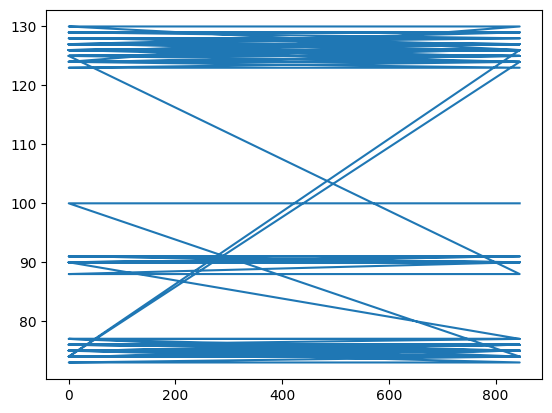

In [114]:
plt.plot(df_save.iloc[:,7])

In [92]:
df_save.head(1)

""


In [19]:
weather_predict(1, '20230209','0200','55','127')

,0,1,2,3,4,5,6,7
0,20230209,0200,TMP,20230209,0300,-4,55,127
1,20230209,0200,UUU,20230209,0300,0.6,55,127
2,20230209,0200,VVV,20230209,0300,-1.1,55,127
3,20230209,0200,VEC,20230209,0300,331,55,127
4,20230209,0200,WSD,20230209,0300,1.3,55,127
...,...,...,...,...,...,...,...,...
841,20230209,0200,POP,20230212,0000,0,55,127
842,20230209,0200,WAV,20230212,0000,0,55,127
843,20230209,0200,PCP,20230212,0000,강수없음,55,127
844,20230209,0200,REH,20230212,0000,90,55,127


In [44]:
df = weather_predict(1, '20230209','0200','55','127')

In [46]:
df.columns = ['base_date','base_time','category','fcst_date','fcst_time','fcst_valuse','nx','ny']

In [47]:
df

,base_date,base_time,category,fcst_date,fcst_time,fcst_valuse,nx,ny
0,20230209,0200,TMP,20230209,0300,-4,55,127
1,20230209,0200,UUU,20230209,0300,0.6,55,127
2,20230209,0200,VVV,20230209,0300,-1.1,55,127
3,20230209,0200,VEC,20230209,0300,331,55,127
4,20230209,0200,WSD,20230209,0300,1.3,55,127
...,...,...,...,...,...,...,...,...
841,20230209,0200,POP,20230212,0000,0,55,127
842,20230209,0200,WAV,20230212,0000,0,55,127
843,20230209,0200,PCP,20230212,0000,강수없음,55,127
844,20230209,0200,REH,20230212,0000,90,55,127


In [9]:
from flask import Flask, request
import mysql.connector
import pandas as pd

app = Flask(__name__)

@app.route("/api/data", methods=["POST"])
def add_data():
    # Extract data from the request
    data = request.get_json()
    
    # Convert the data to a Pandas DataFrame
    df = pd.DataFrame(data)
    
    # Connect to the database
    cnx = mysql.connector.connect(
        host="host_name",
        user="user_name",
        password="password",
        database="database_name"
    )

    # Create a cursor object to execute SQL commands
    cursor = cnx.cursor()
    
    # Insert each row of the DataFrame into the database
    for i, row in df.iterrows():
        # Construct and execute the INSERT INTO SQL command
        sql = "INSERT INTO data (field1, field2) VALUES (%s, %s)"
        cursor.execute(sql, (row["field1"], row["field2"]))
    
    # Commit the changes to the database
    cnx.commit()

    # Close the cursor and connection
    cursor.close()
    cnx.close()

    # Return a success response
    return "Data added successfully", 200

In [10]:
import requests
import pandas as pd

# Create a Pandas DataFrame with the data

# Convert the DataFrame to a JSON string
data = df.to_json(orient="records")

# Send a POST request to the API with the data
response = requests.post("http://localhost:3306/", json=data)

# Check the response
if response.status_code == 200:
    print("Data added successfully")
else:
    print("Failed to add data")

ConnectionError: ('Connection aborted.', BadStatusLine('J\x00\x00\x00\n'))

In [80]:
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="2568"
)

# Create a cursor object to execute SQL commands
cursor = cnx.cursor()

# Execute a SQL command to show all databases
cursor.execute("SHOW DATABASES")

# Print the names of all databases
for db in cursor:
    print(db[0])

# Close the cursor and connection
cursor.close()
cnx.close()

information_schema
mysql
performance_schema
sakila
sys
world


In [85]:
import mysql.connector

mydb = mysql.connector.connect(
	host="localhost",
    user='root',
    password='2568'
    )
  
print(mydb)

In [12]:
import pymysql

In [13]:
# db 연결방법
db = pymysql.connect(host='localhost', user = 'root', password = '2568', charset = 'utf8')
cursor = db.cursor()

In [127]:
cursor.execute('USE test;')
cursor.execute("INSERT INTO `test`.`test_table` (`idtest_table`, `test_tablecol`, `test_tablecol1`) VALUES ('7', '5', '7')")
db.commit()
db.close()